In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
import os
import subprocess
import statistics
import warnings



In [2]:
data = pd.read_csv('iris.csv', header=None)
X = data.iloc[: , :4]
y = pd.Series(map(str, data.iloc[: , 4]))

## Compilación optimizada

In [3]:
os.system('cargo rustc --release -- -C opt-level=3 -C target-cpu=native -C debuginfo=0')

   --> src/dtree.rs:421:42
    |
421 |                     range_threshold.push((possible_thresholds[0] + i as f32 * delta));
    |                                          ^                                         ^
    |
    = note: `#[warn(unused_parens)]` on by default
help: remove these parentheses
    |
421 -                     range_threshold.push((possible_thresholds[0] + i as f32 * delta));
421 +                     range_threshold.push(possible_thresholds[0] + i as f32 * delta);
    |

 --> src/dtree.rs:7:5
  |
7 | use std::io::prelude::*;
  |     ^^^^^^^^^^^^^^^^
  |
  = note: `#[warn(unused_imports)]` on by default

 --> src/dtree.rs:3:5
  |
3 | use rayon::prelude::*;
  |     ^^^^^^^^^^^^^^

 --> src/dtree.rs:1:5
  |
1 | use rand::prelude::*;
  |     ^^^^^^^^^^^^^

 --> src/main.rs:3:5
  |
3 | use rand::prelude::*;
  |     ^^^^^^^^^^^^^

   --> src/dtree.rs:196:21
    |
196 |             let mut c = 0;
    |                     ^
    |
    = note: consider using `_c` inste

0

## Ejecución SK LEARN iris t vs n_features

In [55]:

tree_outputs_iris_vs_features = []
raw_outputs_iris_vs_features = []
for col in range(2, 5):
    X_ = X.iloc[:, :col]
    y_ = y.iloc[:]
    clf = tree.DecisionTreeClassifier(criterion='gini')
    t = %timeit -n 1 -r 5 -o clf.fit(X_, y_)
    
    tree_outputs_iris_vs_features.append(np.mean(t.all_runs)*1000)
    raw_outputs_iris_vs_features.append(t)

719 ms ± 39.5 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
713 ms ± 45.7 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
804 ms ± 25 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


## Ejecución SK LEARN iris t vs n

In [5]:
ns = range(1000, 300001, 1000)
tree_outputs = []
raw_outputs = []
for row in ns:
    X_ = X.iloc[:row, :]
    y_ = y.iloc[:row]
    clf = tree.DecisionTreeClassifier(criterion='gini')
    t = %timeit -n 1 -r 5 -o clf.fit(X_, y_)
    
    tree_outputs.append(np.mean(t.all_runs)*1000)
    raw_outputs.append(t)

7.64 ms ± 2.68 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
4.13 ms ± 616 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
4.96 ms ± 135 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
5.97 ms ± 220 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
7.31 ms ± 299 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
8.41 ms ± 214 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
10.1 ms ± 605 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
12.5 ms ± 1.41 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
12.4 ms ± 123 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
13.9 ms ± 169 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
16.9 ms ± 1.53 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
16.4 ms ± 156 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
19.5 ms ± 2.84 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
20.6 ms ± 1.9 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
20.6 ms ± 156 µs per loop (mean ± std. dev. 

206 ms ± 2.42 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
209 ms ± 2.97 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
210 ms ± 2.66 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
211 ms ± 1.91 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
214 ms ± 1.9 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
219 ms ± 2.27 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
216 ms ± 2.47 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
219 ms ± 2.77 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
221 ms ± 3.33 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
222 ms ± 2.44 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
224 ms ± 3.88 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
226 ms ± 2.65 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
228 ms ± 2.75 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
231 ms ± 2.21 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
234 ms ± 4.02 ms per loop (mean ± std. dev. of 5 

443 ms ± 3.55 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
443 ms ± 4.21 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
452 ms ± 17.7 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
452 ms ± 7.32 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
448 ms ± 2.07 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
455 ms ± 6.88 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
457 ms ± 6.71 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
458 ms ± 3.02 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
465 ms ± 4.38 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
457 ms ± 4.31 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
460 ms ± 2.72 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
462 ms ± 3.1 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
464 ms ± 2.68 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
467 ms ± 4.02 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
469 ms ± 4.97 ms per loop (mean ± std. dev. of 5 

## RUST iris: t vs n

In [6]:
warnings.filterwarnings("ignore")

# Define a list of input values
n = 5
# Initialize an empty list to store the outputs
outputs = []

# Loop over the input values and execute the command

for row in ns:
    inner_t = []

    for i in range(n):
        # Execute the command and capture the output
        output = subprocess.check_output(
            [f'./target/release/decision-tree {row} 4 iris'], shell=True, text=True)
        print(output)
        # Append the output to the list of outputs
        
        inner_t.append(float(output.strip('ms\n')))
        # outputs.append(output)

    outputs.append(np.mean(inner_t))

    # Print the outputs

outputs_ = outputs.copy()

for i in range(len(outputs_)):
    if outputs_[i] < 10:
        outputs_[i] = outputs_[i]*1000
        


31.642381ms

32.136471ms

31.825731ms

31.904473ms

31.798447ms

34.310088ms

33.31508ms

34.261796ms

33.27889ms

33.127519ms

34.300685ms

34.800176ms

34.996754ms

35.117431ms

34.535812ms

35.456799ms

36.818545ms

35.303874ms

35.620762ms

36.003932ms

38.040884ms

37.051004ms

36.986448ms

37.286631ms

37.293791ms

38.847446ms

38.046392ms

38.355825ms

39.877992ms

39.554611ms

39.852513ms

39.369151ms

40.144146ms

39.693634ms

39.558929ms

40.830372ms

41.114211ms

41.346593ms

40.825972ms

48.414132ms

42.663516ms

43.018881ms

42.168292ms

43.301467ms

42.680376ms

43.648811ms

44.650685ms

43.739989ms

43.357234ms

43.650626ms

45.286463ms

44.904752ms

45.317922ms

45.837082ms

44.794821ms

48.782962ms

46.206514ms

46.458891ms

46.436217ms

46.015064ms

47.293043ms

47.753315ms

47.370997ms

47.515579ms

47.89572ms

48.748129ms

50.248756ms

49.015551ms

48.777408ms

48.524649ms

49.530625ms

49.872539ms

49.599575ms

50.350693ms

49.767966ms

51.218562ms

50.905853ms

51

222.269993ms

205.913949ms

206.527681ms

222.567306ms

209.643592ms

217.223877ms

213.630798ms

228.286904ms

203.210968ms

201.182785ms

200.961161ms

224.306524ms

203.814577ms

212.043406ms

212.259039ms

227.383879ms

202.363005ms

213.822205ms

228.676324ms

212.84061ms

229.292999ms

203.855082ms

207.967063ms

209.417707ms

207.720686ms

215.137743ms

210.261808ms

208.099973ms

214.502244ms

215.15878ms

230.821712ms

213.075192ms

232.545674ms

216.014264ms

222.382289ms

229.80842ms

211.371494ms

211.935812ms

239.180701ms

217.370528ms

235.04758ms

212.365841ms

238.272887ms

214.975222ms

246.016773ms

212.679583ms

233.408419ms

227.515275ms

227.359636ms

215.577165ms

216.269481ms

221.527433ms

243.786969ms

228.010979ms

230.953778ms

223.989566ms

221.546052ms

230.690169ms

228.206804ms

245.48127ms

229.019236ms

242.6232ms

247.158444ms

233.447663ms

233.442617ms

245.681397ms

246.063567ms

231.85332ms

236.02893ms

245.895091ms

236.026057ms

243.491569ms

2

432.227127ms

432.640545ms

428.950217ms

429.065619ms

428.286522ms

436.003344ms

431.383859ms

428.570125ms

442.993442ms

435.843189ms

429.626278ms

427.909244ms

424.519642ms

423.583186ms

433.291964ms

433.533147ms

432.210148ms

435.887063ms

433.018317ms

429.85238ms

431.783938ms

416.761936ms

434.970258ms

437.727585ms

436.913676ms

428.988615ms

434.363519ms

422.154178ms

426.565289ms

445.47768ms

434.356168ms

435.978697ms

440.909347ms

435.207389ms

442.676101ms

459.385189ms

417.373558ms

437.489687ms

444.995917ms

442.493934ms

438.248987ms

434.711237ms

441.436877ms

453.256347ms

461.53395ms

438.129533ms

438.915011ms

453.023789ms

444.068878ms

459.798843ms

439.83676ms

447.44319ms

453.306607ms

451.205422ms

447.677416ms

453.646212ms

449.313639ms

458.007875ms

445.777285ms

448.069978ms

455.368116ms

454.21957ms

463.940331ms

456.411634ms

444.161755ms

463.90708ms

451.570102ms

462.308578ms

458.851518ms

476.332392ms

458.774463ms

466.345643ms


## RUST iris: t vs n_features

In [28]:
warnings.filterwarnings("ignore")

# Define a list of input values
n = 5
# Initialize an empty list to store the outputs
outputs_t_vs_n_features = []

# Loop over the input values and execute the command

for cols in range(2, 5):
    inner_t = []

    for i in range(n):
        # Execute the command and capture the output
        output = subprocess.check_output(
            [f'./target/release/decision-tree 300000 {cols} iris'], shell=True, text=True)
        print(output)
        # Append the output to the list of outputs
        
        inner_t.append(float(output.strip('ms\n')))
        # outputs.append(output)

    outputs_t_vs_n_features.append(np.mean(inner_t))

    # Print the outputs

outputs_t_vs_n_features_ = outputs_t_vs_n_features.copy()

for i in range(len(outputs_t_vs_n_features_)):
    if outputs_t_vs_n_features_[i] < 10:
        outputs_t_vs_n_features_[i] = outputs_t_vs_n_features_[i]*1000
        


843.868359ms

686.889935ms

727.200238ms

702.604595ms

637.584765ms

623.864912ms

587.074209ms

614.965039ms

579.299459ms

584.432543ms

971.877966ms

716.649186ms

793.707324ms

901.292964ms

785.406631ms



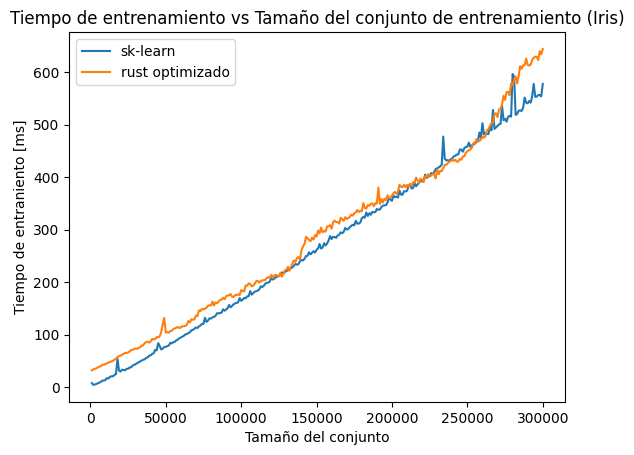

In [12]:


plt.plot(ns, tree_outputs, label='sk-learn')
plt.plot(ns, outputs_, label="rust optimizado")
plt.xlabel("Tamaño del conjunto")
plt.ylabel("Tiempo de entraniento [ms]")
plt.title("Tiempo de entrenamiento vs Tamaño del conjunto de entrenamiento (Iris)")
plt.legend()
plt.savefig("rust_vs_sklearn.pdf")

## Prueba dataset simple (iris)

In [8]:
inner_t = []

for i in range(50):
    # Execute the command and capture the output
    output = subprocess.check_output(
        [f'./target/release/decision-tree 150 4 iris'], shell=True, text=True)

    # Append the output to the list of outputs

    inner_t.append(float(output.strip('ms\n')))
    # outputs.append(output)

inner_t

[30.404017,
 30.37572,
 30.727022,
 30.378453,
 30.104351,
 30.271349,
 30.157735,
 30.162467,
 30.201709,
 30.123781,
 30.219839,
 30.223838,
 30.221719,
 30.236989,
 30.085559,
 30.22299,
 30.23592,
 30.203567,
 30.181763,
 30.476152,
 30.376839,
 30.261718,
 30.157997,
 34.367092,
 30.084037,
 30.406132,
 32.033106,
 30.191814,
 30.308292,
 30.588134,
 30.097873,
 30.218357,
 30.24915,
 30.1411,
 30.120251,
 30.402793,
 30.082591,
 30.534409,
 30.24952,
 30.092548,
 30.261119,
 30.08872,
 30.250325,
 30.627583,
 30.321295,
 30.282563,
 30.219773,
 30.327315,
 30.212084,
 30.075791]

In [ ]:
data = pd.read_csv('data.csv', header=None)
X_cancer = data.iloc[: , :13]
y_cancer = pd.Series(map(str, data.iloc[: , 13]))

## SKLEARN cancer t vs n_features

In [101]:
trees

[DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier()]

In [117]:
X_cancer

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,58,0,0,170,225,1,0,146,1,2.8,1,2,1
299996,67,1,2,152,212,0,0,150,0,0.8,1,0,3
299997,44,1,0,120,169,0,1,144,1,2.8,0,0,1
299998,63,1,0,140,187,0,0,144,1,4.0,2,2,3


In [116]:
clf_ = tree.DecisionTreeClassifier(criterion='gini')
t = %timeit -n 1 -r 5 -o clf_.fit(X_cancer.iloc[:, :12], y_cancer.iloc[:])

879 ms ± 17.6 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [115]:

tree_outputs_cancer_vs_features = []
raw_outputs_cancer_vs_features = []
for col in range(2, 14):
    X_cancer_ = X_cancer.iloc[:, :col]
    y_cancer_ = y_cancer.iloc[:]
    clf = tree.DecisionTreeClassifier(criterion='gini')
    t = %timeit -n 1 -r 5 -o clf.fit(X_cancer_, y_cancer_)
    
    tree_outputs_cancer_vs_features.append(np.mean(t.all_runs)*1000)
    raw_outputs_cancer_vs_features.append(t)

608 ms ± 32.9 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
618 ms ± 6.3 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
678 ms ± 29 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
694 ms ± 7.86 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
721 ms ± 13.2 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
779 ms ± 42.4 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
906 ms ± 91.9 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
833 ms ± 75.6 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
926 ms ± 58.6 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
973 ms ± 38.7 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
940 ms ± 46 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
935 ms ± 37.4 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


## SK LEARN cancer t vs n

In [22]:
ns = range(1000, 300001, 1000)
tree_outputs_cancer = []
raw_outputs_cancer = []
for row in ns:
    X_cancer_ = X_cancer.iloc[:row, :]
    y_cancer_ = y_cancer.iloc[:row]
    clf = tree.DecisionTreeClassifier(criterion='gini')
    t = %timeit -n 1 -r 5 -o clf.fit(X_cancer_, y_cancer_)
    
    tree_outputs_cancer.append(np.mean(t.all_runs)*1000)
    raw_outputs_cancer.append(t)

6.71 ms ± 3.71 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
7.11 ms ± 750 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
8.78 ms ± 1.47 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
9.46 ms ± 319 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
11.4 ms ± 493 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
14.6 ms ± 2.01 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
15.1 ms ± 454 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
19 ms ± 1.36 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
21 ms ± 2.8 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
23.4 ms ± 1.58 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
28.6 ms ± 3.51 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
25 ms ± 1.07 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
29.4 ms ± 2.21 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
35.7 ms ± 5.6 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
39.5 ms ± 4.02 ms per loop (mean ± std. dev. o

298 ms ± 6.76 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
304 ms ± 6.51 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
300 ms ± 5.78 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
307 ms ± 6.07 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
310 ms ± 5.96 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
310 ms ± 5.89 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
315 ms ± 6.82 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
324 ms ± 5.94 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
319 ms ± 6.29 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
325 ms ± 7.07 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
328 ms ± 7.42 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
330 ms ± 5.52 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
334 ms ± 5.33 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
334 ms ± 6.97 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
336 ms ± 6.34 ms per loop (mean ± std. dev. of 5

791 ms ± 16.8 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
671 ms ± 19.2 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
670 ms ± 10.6 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
681 ms ± 10 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
680 ms ± 8.06 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
700 ms ± 34.1 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
694 ms ± 12 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
692 ms ± 10.8 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
718 ms ± 13.9 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
709 ms ± 14.8 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
725 ms ± 30.8 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
710 ms ± 8.1 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
714 ms ± 10.5 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
701 ms ± 9.74 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
715 ms ± 9.05 ms per loop (mean ± std. dev. of 5 runs

## RUST CANCER: t vs n

In [23]:
warnings.filterwarnings("ignore")

# Define a list of input values
n = 5
# Initialize an empty list to store the outputs
outputs_cancer = []

# Loop over the input values and execute the command

for row in ns:
    inner_t = []

    for i in range(n):
        # Execute the command and capture the output
        output = subprocess.check_output(
            [f'./target/release/decision-tree {row} 13 data'], shell=True, text=True)
        print(output)
        # Append the output to the list of outputs
        
        inner_t.append(float(output.strip('ms\n')))
        # outputs.append(output)

    outputs_cancer.append(np.mean(inner_t))

    # Print the outputs

outputs_c = outputs_cancer.copy()

for i in range(len(outputs_c)):
    if outputs_c[i] < 10:
        outputs_c[i] = outputs_c[i]*1000
        


65.649401ms

65.564628ms

65.411476ms

65.20896ms

66.414574ms

78.333791ms

79.578636ms

78.480938ms

78.566153ms

78.72692ms

90.390936ms

90.724841ms

90.540841ms

91.298468ms

89.972681ms

98.734782ms

99.283194ms

99.207298ms

99.377767ms

98.959012ms

113.872862ms

112.058148ms

113.371214ms

113.694633ms

113.022203ms

125.64927ms

122.623121ms

123.837883ms

123.609652ms

124.123101ms

137.789922ms

131.423524ms

137.285488ms

132.03372ms

132.144248ms

141.734486ms

141.274126ms

200.878048ms

144.434322ms

150.052088ms

155.029993ms

156.159709ms

159.383934ms

157.75925ms

157.809942ms

168.021767ms

169.977993ms

171.289833ms

176.414666ms

168.814537ms

181.189645ms

180.555646ms

187.434379ms

178.874936ms

181.939233ms

195.64298ms

192.186217ms

195.028351ms

190.944299ms

192.737823ms

204.141456ms

199.629007ms

202.623906ms

218.950093ms

198.01842ms

208.836488ms

208.731005ms

208.56506ms

209.234558ms

210.667602ms

219.757735ms

219.428588ms

220.320343ms

222.47

1.840053366s

1.854709701s

1.92941371s

1.836179859s

1.821764223s

1.85465858s

1.864986275s

1.87031205s

1.85578098s

1.869366883s

1.873153192s

1.89039375s

1.833433351s

1.862796025s

1.892014891s

2.13456324s

1.88551113s

1.874860598s

1.867707337s

1.893070878s

1.907141637s

1.881355306s

1.879084844s

1.903364648s

1.897620425s

1.919051275s

1.903280911s

2.03329814s

2.05652329s

1.977132953s

2.039461352s

2.013325316s

2.039200475s

2.006160668s

2.017194537s

2.031776976s

1.998702717s

2.026777705s

2.001498883s

1.992166571s

2.005529361s

2.05084971s

2.083269556s

2.133852071s

2.07982934s

2.071078832s

2.127809657s

2.118798913s

2.058543743s

2.085430158s

2.102350527s

2.089210488s

2.096505758s

2.132861133s

2.124551718s

2.110916807s

2.119742601s

2.171819837s

2.189110575s

2.186312888s

2.206969582s

2.181206793s

2.253245733s

2.282899387s

2.212540497s

2.225294731s

2.214162395s

2.23819418s

2.227141147s

2.241827591s

2.249183953s

2.232230784s

2.30

4.402550733s

4.480095943s

4.72843835s

4.475280114s

4.842074156s

4.487547706s

4.456731561s

4.474125205s

4.488407852s

4.487256792s

4.509172764s

4.431818077s

4.470204299s

4.462485164s

4.503757745s

4.440527101s

4.531778465s

4.471614168s

4.440779502s

4.504051945s

4.510431869s

4.517125113s

4.502127728s

4.479560694s

4.440998121s

4.468533361s

4.527021064s

4.52382445s

4.50490166s

4.513355728s

4.488865262s

4.509951781s

5.243730456s

4.50935176s

4.561321161s

4.502094114s

4.595088797s

4.505042874s

4.506078413s

4.518925948s

4.49953206s

4.512314791s

4.584374016s

4.561962644s

4.538145197s

4.621162308s

4.548856317s

4.63899829s

4.559286882s

4.54672837s

4.634384131s

4.576588744s

4.537624412s

4.616427709s

4.622890935s

4.542118943s

4.67563225s

4.624086442s

4.659115069s

4.753862753s

4.817851192s

4.726868821s

4.971236352s

4.789904776s

4.692186561s

4.694499601s

4.863181636s

4.730902237s

4.634892755s

4.754157263s

4.689885401s

4.725518178s



## RUST CANCER: t vs n_features

In [29]:
warnings.filterwarnings("ignore")

# Define a list of input values
n = 5
# Initialize an empty list to store the outputs
outputs_t_vs_n_features_cancer = []

# Loop over the input values and execute the command

for cols in range(2, 14):
    inner_t = []

    for i in range(n):
        # Execute the command and capture the output
        output = subprocess.check_output(
            [f'./target/release/decision-tree 300000 {cols} data'], shell=True, text=True)
        print(output)
        # Append the output to the list of outputs
        
        inner_t.append(float(output.strip('ms\n')))
        # outputs.append(output)

    outputs_t_vs_n_features_cancer.append(np.mean(inner_t))

    # Print the outputs

outputs_t_vs_n_features_cancer_ = outputs_t_vs_n_features_cancer.copy()

for i in range(len(outputs_t_vs_n_features_cancer_)):
    if outputs_t_vs_n_features_cancer_[i] < 10:
        outputs_t_vs_n_features_cancer_[i] = outputs_t_vs_n_features_cancer_[i]*1000
        


306.698976ms

294.921777ms

339.526362ms

321.56478ms

320.559859ms

585.689565ms

565.730825ms

574.764642ms

524.306511ms

474.190308ms

1.059041893s

1.049332462s

1.076691716s

1.069201477s

1.158259777s

2.204148101s

1.844246915s

1.844412924s

2.068724135s

2.063814934s

2.030980561s

2.116798229s

1.933878014s

1.918865677s

2.025699825s

2.422551902s

2.28284631s

2.218341217s

2.233620071s

2.265563547s

3.128185532s

2.853598282s

2.818910651s

2.834090806s

2.846799741s

3.454060116s

3.471010055s

3.487715419s

3.478119261s

3.485510721s

4.558577207s

4.497824567s

4.550095657s

4.702338524s

4.523208033s

5.131171821s

5.106496158s

5.091185559s

5.091063215s

5.1491222s

5.608178813s

5.580511772s

5.562059944s

5.494493871s

5.609712274s

5.744305352s

5.843919714s

5.811823901s

5.87117777s

5.792283981s



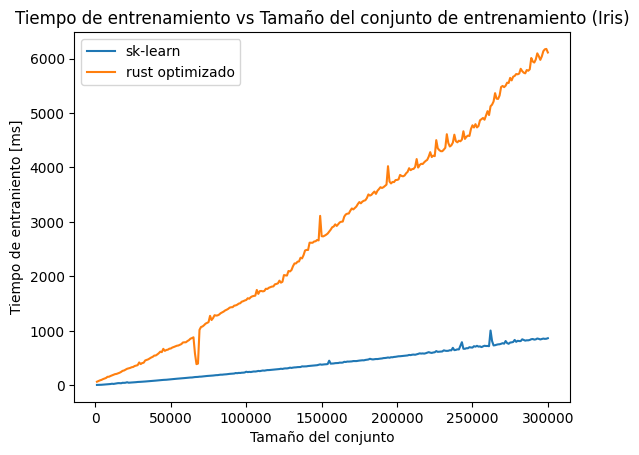

In [24]:


plt.plot(ns, tree_outputs_cancer, label='sk-learn')
plt.plot(ns, outputs_c, label="rust optimizado")
plt.xlabel("Tamaño del conjunto")
plt.ylabel("Tiempo de entraniento [ms]")
plt.title("Tiempo de entrenamiento vs Tamaño del conjunto de entrenamiento (Iris)")
plt.legend()
plt.savefig("rust_vs_sklearn.pdf")

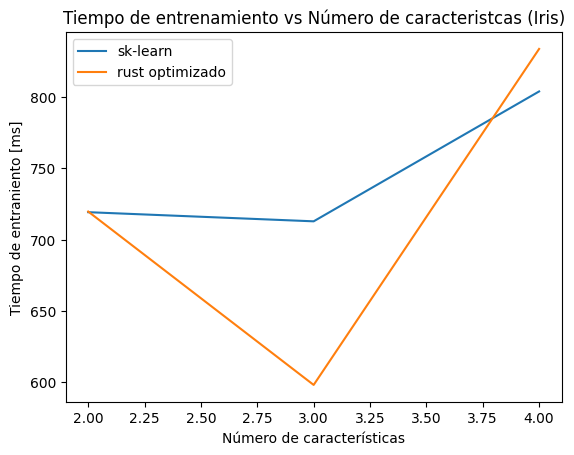

In [61]:


plt.plot(range(2, 5), tree_outputs_iris_vs_features, label='sk-learn')
plt.plot(range(2, 5), outputs_t_vs_n_features_, label="rust optimizado")
plt.xlabel("Número de características")
plt.ylabel("Tiempo de entraniento [ms]")
plt.title("Tiempo de entrenamiento vs Número de caracteristcas (Iris)")
plt.legend()
plt.savefig("rust_vs_sklearn_features_iris.pdf")

In [65]:
outputs_t_vs_n_features_cancer_

[316.6543508,
 544.9363702,
 1082.505465,
 2005.0694018000002,
 2005.2444612000002,
 2284.5846094000003,
 2896.3170023999996,
 3475.2831143999997,
 4566.408797599999,
 5113.807790600001,
 5570.9913348,
 5812.7021436]

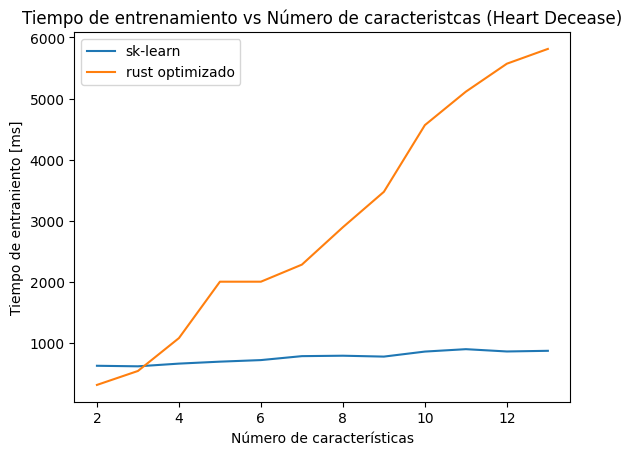

In [66]:


plt.plot(range(2, 14), tree_outputs_cancer_vs_features, label='sk-learn')
plt.plot(range(2, 14), outputs_t_vs_n_features_cancer_, label="rust optimizado")
plt.xlabel("Número de características")
plt.ylabel("Tiempo de entraniento [ms]")
plt.title("Tiempo de entrenamiento vs Número de caracteristcas (Heart Decease)")
plt.legend()
plt.savefig("rust_vs_sklearn_features_cancer.pdf")

In [77]:
import sklearn
sklearn.__version__

'1.2.1'

In [80]:
from platform import python_version

python_version()

'3.11.2'